#### Decision Trees - Regression and Classification
- Idea of classifying using rules, summary of tree algorithm for classification and regression 
- Main Criteria for splitting in Classification
  - Gini Impurity 
  - Cross Entropy
  - Misclassification. 
- Criteria for Regression   
- Tree  Algorithms 
- CART algorithm : Mathematical formulation 
- Tree parametrs : Control overfitting of tree , other classifiertree params
  - pre-pruning vs post pruning  
- sklearn tree implementation 
  - Example on iris data for classification
    - visualizing tree
    - decision boundary of trees to see decision boundaries they can learn, also see overfitting problem  
    - feature importance
- Addressing class imbalance
  - Is the Information criteria adjusted with class weights?
- Multi-Output problems 
- Practical Tips 
- Pros and Cons

In [2]:
import numpy as np
import pandas as pd 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, classification_report
import graphviz
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
plt.style.use('bmh')
%matplotlib inline

#### 1. Idea of classifying using rules, summary of tree algorithm for classification and regression  
- Idea of asking a bunch of questions to get to classify an object.
- Example of plane, birs, bus, car, dog, horse 
- The representation of asking a set of sequential questions to get to an answer can be represented as a tree
  - Each question splits a node into sub-nodes, that carry possibilities, and tree grows until the classification is found 
  - Ideas of root node, leaf nodes
- Using training data, rules can be learnt starting from thr most promising question  
- **A tree algorithm for supervised classification learning has the following main ideas -**
   - to split training data using variables and splitting points, to divide the data into homogeneous sets, homogenity in terms of target labels.
   - Since multiple such splits are possible, it is computationally challenging to evaluate every possibility
   - a greedy approach is to determine the most promising variable and a splitting point - to filter a data set into two/multiple sets, such that the resulting data are homogeneous in terms of having similar labels together
   - keep growing the tree till we get pure nodes 
      - This gets into an overfitting siutation, and can results in deep trees
      - Measures to prune the tree, two general approaches taken : pre-runing and post pruning 
   - In the resulting leaf nodes, majority label is identified, and a probability is assigned based on counts in the
     bucket
     - There is also an idea of support to the probability, i.e how many samples a node carries to support the probability calculation. 
   - Any new sample, can be taken through the tree / or rules to arrive at a label  

#### 2. 1 Criteria  for classification
- The evaluation of recursive split if there is information gained in doing the split 
- In classification setting three criteria are used, apparently, there are many that can be used 
  - **Gini Impurity of a node : If a random case was chosen from a node, and classified by the distribution of labels in the node,what is the probability of misclassification**
    - For a two class case, we can say this will be $P(k_1)*P(k_2) + P(k_2)*P(k_1)$, and can be defined as-  
      $\sum_k p_{mk}*(1-p_{mk})$, where m is a node, $p_k$ is probability if one class
    - Using the definition though a three class scenario will have it as - 
      - $P(k_1)* [P(k_2) + P(k_3)] + P(k_2)*[P(k_1) + P(k_3)] + P(k_3) * [P(k_1) + P(k_2)]$
      - For a binary classification case, Gini Impurity lies between 0 and 0.5, 0 indicates 0 impurity, i.e node
      is pure, 0.5 is when node has 50% distribution of each class
  - **Cross Entropy / Information statistic** : Comes from communication theory. In predictive classification, gives a 
  measure of class imbalance. More the imbalance, less the entropy i.e extent of getting a class label wrong. 
      - $ - \sum_k p_{mk}*log_2(p_{mk})$
      - Customary to take p*log(p) as 0, when p = 0
      - When class is pure, imbalance is least, cross entropy is 0.  
      - For a two class scenario, cross entropy is similar to log likelihood function / log loss used in logistic
        regression.  
  - **Misclassification** : If the node was labeled per the major class distribution, extent of misclassification 
    - For a two class case = $ p_{minor}$  
- For evaluation of a split into say two nodes, the criteria is evaluated for each subnode and a weighted average by
  number of samples is taken. 
  - Reduction in Gini Impurity. 
  - Information gain 
  - Decrease in misclassifcation

#### 2.1 Comparison. 
- Cross entropy has the slowest rate of change for change in class proportion, so it allows more splitting opportunities, it varies from 0 to 1

In [3]:
prob_k1 = np.linspace(0.01, 0.99, 50)
prob_k2 = 1-prob_k1
Gini_Impurity = 2 * prob_k1 * prob_k2
Cross_Entropy = -1*(prob_k1 * np.log2(prob_k1) + prob_k2 * np.log2(prob_k2))
mis = np.minimum(prob_k1, prob_k2)

Text(0.5, 1.0, 'Splitting criterion for 2 class scenario')

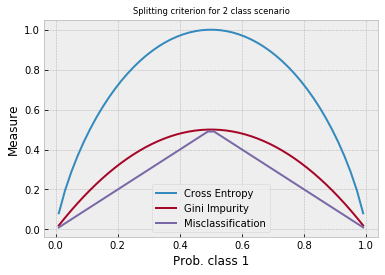

In [4]:
plt.figure()
plt.plot(prob_k1, Cross_Entropy, label = 'Cross Entropy')
plt.plot(prob_k1, Gini_Impurity, label = 'Gini Impurity')
plt.plot(prob_k1, mis, label = 'Misclassification')
plt.xlabel('Prob. class 1')
plt.ylabel('Measure')
plt.legend()
plt.title('Splitting criterion for 2 class scenario', fontsize = 'small')

#### 2.2 Criteria for Regression 
- Mean squared error , error from mean 
- Mean absolute error, erro from median

#### 3. Tree algorithms 
Ross Quinlin , first three. 
- ID3 : Itrative dichotomizer
  - Creates multiway tree, not binary like CART 
  - Split on categorical features, no support for numerical features 
  - post pruning for generalization. 
- C4.5 
  - Added splitting for numerical features 
  - Created if then rules, refined these rules through post pruning 
- C5 
  - released under proprietary license
- CART 
  - performs binary split 
  - supports categorical and numerical features, i.e even if categorical features were not converted using an encoding like one-hot,algorithm would bisect categories 
  - Uses information gain
  - I think it uses pre-pruning technique by adding a regularization parameter, called cost complexity, which is 
  proprtional to number of leaf nodes. 
  
**sklearn uses CART, and optimized implementation - pre-pruning is handled by introducing hyperparameters to control growth of tree, but it requires categorical features to be converted to numeric form**  

#### 4. CART algorithm : Mathematical formulation 
- Refer to Max Kuhn's Applied Predictive Modeling 
- What is noteworthy is that algorithm adds a parameter called cost complexity paramter, that penalized the information statistic for the depth at which it is computed
- Hence, the information gain, has to overweigh the reduction in optimization function posed by increase in penalty  

#### 5. Tree parameters : Controlling overfitting of trees , other classifier parameters
- CART algorithm uses pre-pruning 
- C4.5 seems to use post pruning, SAS Eminer suggests that approach 
- CART's implementations have added a lot of parameters that can control growth of deep trees,**sklearn control overfitting**
  - max_depth : 
  - max_leaf_nodes : 
  - min_samples_split : min samples requires in a node to be split further , float implies fraction
  - min_samples_leaf : min no. of samples required in a leaf node for the generating split to occur (**Has an effect of smoothing, esp. in regression**)
  - min_impurity_decrease: for a split to occur for early stopping,**should not use, because a low gain split may be followed by high gain split**
- **Implementation to address bias due to highly imbalanced classes, covered below** 
  - class_weight : **assigns a weight to each class, and changes probability calcultion of each class, and hence the impurity calculation**
  - min_weight_fraction_leaf
- criterion : gini / entropy 
- **Randomness introducing parameters to avoid multicolinarity effect** - 
  - splitter : splitting strategy at each node : best, random 
  - max_features : number / fraction of features to consider for each split, this can be bypassed in search of a valid
  split that more features could provide 

**sample_weight** 
- parameter available for setting with fit methods, this assigns weights at a record level, could
be useful in scenarios where we have say varied confidence in each record

#### 6. Classification Example

In [15]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
Y = data.target
print(data.feature_names)
print(X.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, shuffle = True, 
                                                    stratify = Y,random_state = 22)

In [17]:
clf = DecisionTreeClassifier()
scv = StratifiedKFold(n_splits = 3, shuffle = True, random_state= 22)
grid = {"criterion" : ['gini', 'entropy'],
         "max_depth" : [4,6,8],
         "min_samples_split" : [2,5],
         'min_samples_leaf' : [2,4,6]}

f1_macro = make_scorer(score_func= f1_score, average = 'macro')
gcv_clf = GridSearchCV(estimator= clf, param_grid= grid, cv = scv, scoring = f1_macro)
gcv_clf.fit(X_train,Y_train)

/Users/sumad/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=22, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 6, 8], 'min_samples_split': [2, 5], 'min_samples_leaf': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=macro), verbose=0)

In [18]:
results = pd.DataFrame(gcv_clf.cv_results_).loc[:,['param_criterion', 'param_max_depth','param_min_samples_split',
                                         'param_min_samples_leaf',
                                        'mean_train_score','mean_test_score','std_test_score','rank_test_score']]
results.head()

/Users/sumad/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sumad/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sumad/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sumad/anaconda3/lib/python

,param_criterion,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_train_score,mean_test_score,std_test_score,rank_test_score
0,gini,4,2,2,0.983378,0.974965,0.000877,1
1,gini,4,5,2,0.983378,0.974965,0.000877,1
2,gini,4,2,4,0.966673,0.966642,0.010465,13
3,gini,4,5,4,0.966673,0.966642,0.010465,13
4,gini,4,2,6,0.966673,0.966642,0.010465,13


#### 6.1 Visualize tree

In [19]:
tree_best = DecisionTreeClassifier(criterion = 'gini', max_depth= 4, min_samples_leaf= 2)
tree_bad = DecisionTreeClassifier(criterion = 'gini', max_depth= 4,  min_samples_leaf= 6)
tree_best.fit(X_train, Y_train)
tree_bad.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

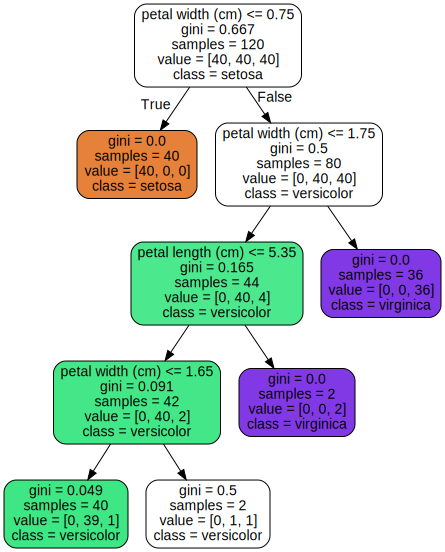

In [20]:
# Save the tree structure in a text file
dot_data = tree.export_graphviz(tree_best, out_file = None,
                          feature_names = data.feature_names,
                         class_names = data.target_names,
                          #aesthetic options
                         filled = True,rounded = True)
# plot tree structure from text file 
graph1 = graphviz.Source(dot_data)
graph1

#### Gini Computations for 3 class case
- Depth 0 Gini
  - $0.33*(0.33+0.33)*3 = 0.66$
- Depth 1 Gini
  - $0 * (40/120)+ [0.5*(0+0.5)*2] * (80/120) = 0.33$
- Depth 2 Gini
  - $(44/80) * [(40/44) * (4/44) *2] + (36/80) * [0] = 0.091$
- Depth 3 Gini
  - $(42/44) * [(40/42) * (2/42) *2] + (2/44) * [0] = 0.087$
- Depth 4 Gini
  - $((40/42)*0.049 + (2/42)*0.5 = 0.07$  

In [50]:
(40/42)*0.049 + (2/42)*0.5

0.07047619047619047

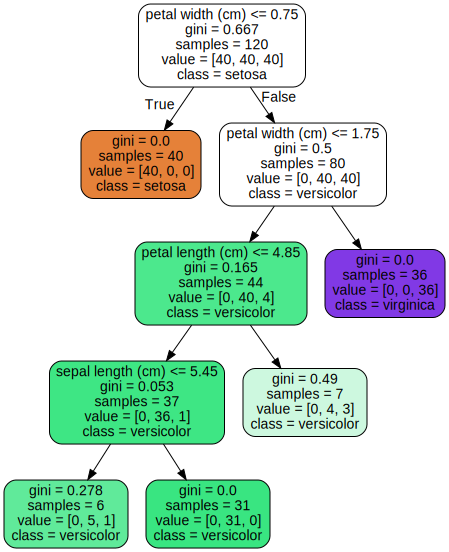

In [21]:
# Save the tree structure in a text file
dot_data = tree.export_graphviz(tree_bad, out_file = None,
                          feature_names = data.feature_names,
                         class_names = data.target_names,
                          #aesthetic options
                         filled = True,rounded = True)
# plot tree structure from text file 
graph2 = graphviz.Source(dot_data)
graph2

#### 6.2 decision boundary of trees to see decision boundaries they can learn, also see overfitting problem
- Below, both trees score on test set, outside of the 2 std. deviation of mean cv test scores
  - One shortocming is that performance measure should have been taken by using nested cv
  - Still, trees do overfit
- Trees learn rectangular decision boundaries, see decision boundary plots on paired features  

In [ ]:
print('Best tree\'s score on test :',tree_best.score(X_test,Y_test))
print('Bad tree\'s score on test :',tree_bad.score(X_test,Y_test))

<IPython.core.display.Javascript object>


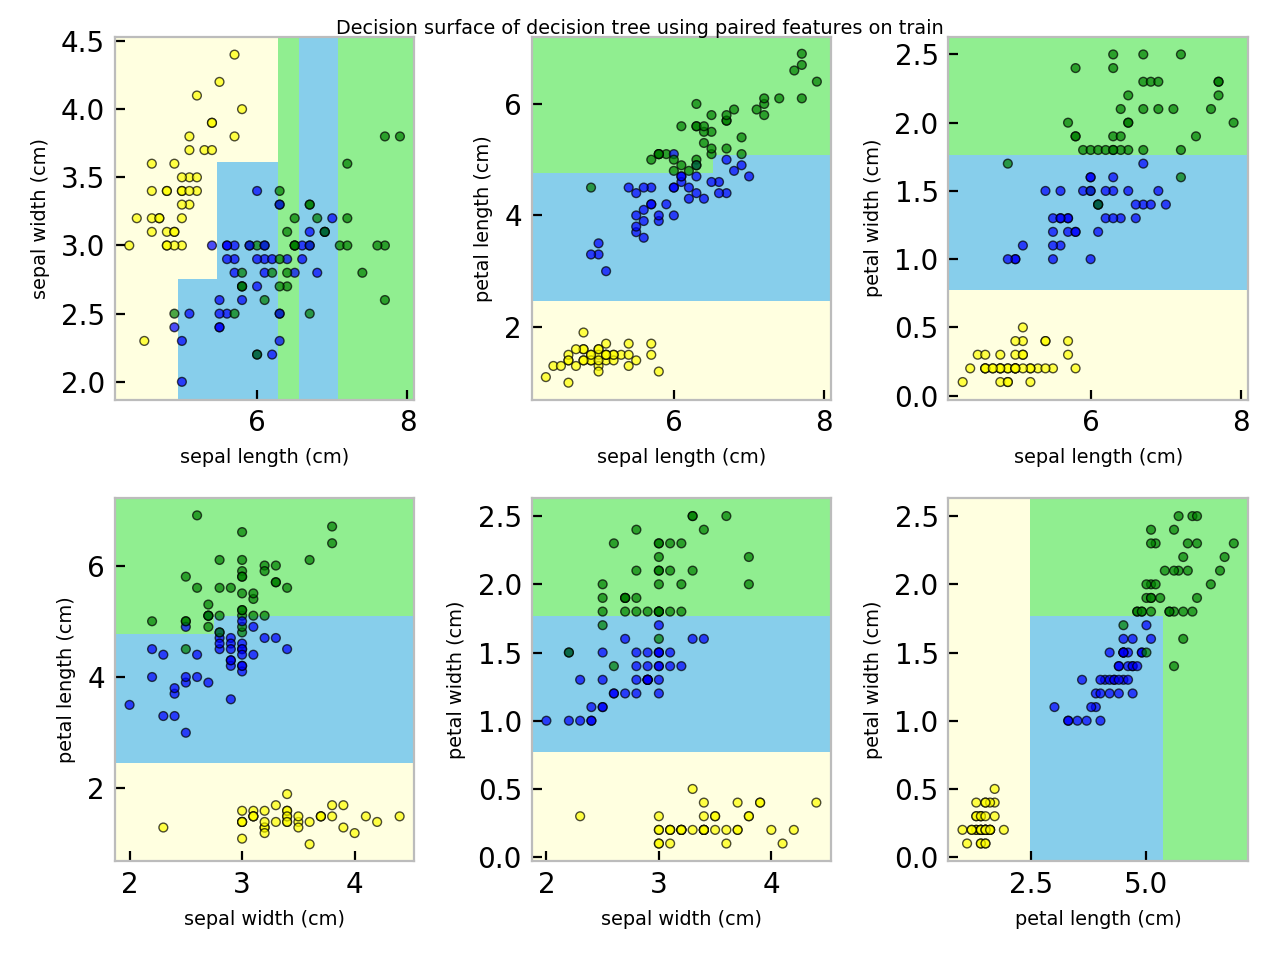

Text(0.5, 0.98, 'Decision surface of decision tree using paired features on train')

In [25]:
feature_dic = {}
for i,j in enumerate(data.feature_names):
    feature_dic[i] = j
    

def plot_db(clf, X, Y, i):
    ax = plt.subplot(2,3, i+1)
    c_points = ListedColormap(['yellow', 'blue', 'green' ])
    c_bound = ListedColormap(['lightyellow', 'skyblue', 'lightgreen'])
    plt.scatter(X[:,0], X[:,1], c = Y, 
                cmap = c_points,alpha = 0.7, edgecolor = 'black',s= 10)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    x = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
    #print(x.shape)
    pred = clf.predict(x).reshape(xx.shape)
    #print(pred.shape)
    plt.pcolormesh(xx,yy,pred,cmap = c_bound)
    plt.scatter(X[:,0], X[:,1], c = Y, 
                cmap = c_points,alpha = 0.7, edgecolor = 'black',s= 10)
    
feature_pairs = [[0,1], [0,2], [0,3],[1,2], [1,3], [2,3]]
plt.figure()
for i,pair in enumerate(feature_pairs):
    clf = DecisionTreeClassifier(criterion = 'gini', max_depth= 4, min_samples_leaf= 2)
    clf.fit(X_train[:,pair], Y_train)
    plot_db(clf, X_train[:,pair], Y_train, i)
    plt.tight_layout()
    plt.xlabel(feature_dic[pair[0]], fontsize = 'x-small')
    plt.ylabel(feature_dic[pair[1]], fontsize = 'x-small')
plt.suptitle("Decision surface of decision tree using paired features on train",fontsize = 'x-small')    

#### 6.3 Feature Importance 
- computed by weighting sum of decrease in impurity measure, by fraction of samples in the split 
- rescaling weighted sum of all features to be 1

##### Example of best_fit tree above
- Petal Width 
  - 0.66 -> 0.33 , 0.33 -> 0.091, 0.087 -> 0.07 
  - (120/120)*0.33 + (80/120)*0.239 + (42/120)*0.017 = 0.495
-  Petal Length 
  - 0.091 -> 0.087
  - 0.04 * (44/120) = 0.015

In [59]:
0.495 /(0.495+0.015)

0.9705882352941176

In [60]:
0.015 /(0.495+0.015)

0.029411764705882353

In [35]:
print(feature_dic)
tree_best.feature_importances_

{0: 'sepal length (cm)', 1: 'sepal width (cm)', 2: 'petal length (cm)', 3: 'petal width (cm)'}


array([ 0.        ,  0.        ,  0.04494748,  0.95505252])

#### 7. Handling class imbalance
**Class imbalance has many approaches to handle, common being** 
    - oversampling minor class, undersampling major class, mixed approach , change loss function to weight classes 
      differently
    - sklearn allows using class_weights, if 'balanced', weights are computed as per two equations for binary    
      classification :
       - w1*n1 = w2*n2
       - w1*n1 + w2*n2 = n1 + n2  
       - w1 = (n1+ n2)/2*n1
       - w2 = (n1+ n2)/2*n2
    - Weights are then used to compute probabilities, affecting impurity calculations and splitting of tree 
      - g = 2 *p1 *p2
      - p1 = w1 * n1 / (w1*n1 + w2*n2) 
      - p2 = w1 * n1 / (w1*n1 + w2*n2)
    - class_weight can also be tuned 
    - **sample_weight** is different from class_weight, in that it applies weights to records/samples instead of classes, and it available as an attibute within fit method 
- Example of iris data set, create imbalanced class 2 
- turn into binary class problem

In [175]:
mask1 = (Y==0) | (Y==1)
mask2 = Y == 2
X_01 = X[mask1,:].copy()
X_2 = X[mask2,:].copy()

Y_01 = Y[mask1].copy().reshape(-1,1)
Y_2 = Y[mask2].copy().reshape(-1,1)

ind = np.random.randint(low = 0, high= len(Y_2), size = int(.2*len(Y_2)))
X_2_sub = X_2[ind,:]
Y_2_sub = Y_2[ind].reshape(-1,1)
X_new = np.vstack((X_01, X_2_sub))
Y_new = np.vstack((Y_01, Y_2_sub))

Y_new_0 = (Y_new==2).astype('int32')
print(X_new.shape)
print(sum(Y_new_0 == 0), sum(Y_new_0 == 1))

(110, 4)
[100] [10]


In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y_new_0, test_size = 0.2, shuffle = True, 
                                                    stratify = Y_new_0,random_state = 22)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('Y_train_0 = {0}; Y_train_1 = {1}'.format(sum(Y_train ==0), sum(Y_train ==1)))
tree_ub = DecisionTreeClassifier(criterion = 'gini', max_depth= 4, min_samples_leaf= 4)
tree_bal = DecisionTreeClassifier(criterion = 'gini', max_depth= 4, min_samples_leaf= 4, 
                                  class_weight= 'balanced')
tree_bal_2 = DecisionTreeClassifier(criterion = 'gini', max_depth= 4, 
                                    #min_samples_leaf= 4, 
                                  class_weight= 'balanced', min_weight_fraction_leaf= 0.1)
tree_ub.fit(X_train, Y_train)
tree_bal.fit(X_train, Y_train)
tree_bal_2.fit(X_train, Y_train)

X_train : (88, 4)
X_test : (22, 4)
Y_train_0 = [80]; Y_train_1 = [8]


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.1, presort=False, random_state=None,
            splitter='best')

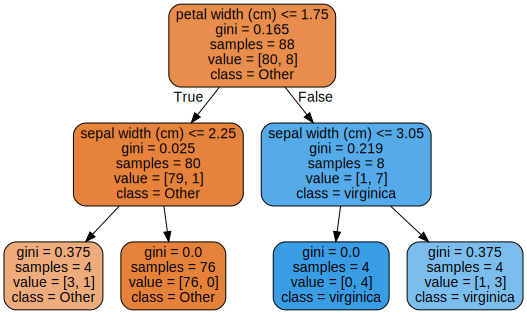

In [209]:
# Save the tree structure in a text file
dot_data = tree.export_graphviz(tree_ub, out_file = None,
                          feature_names = data.feature_names,
                         class_names = ['Other', 'virginica'],
                          #aesthetic options
                         filled = True,rounded = True)
# plot tree structure from text file 
graph2 = graphviz.Source(dot_data)
graph2

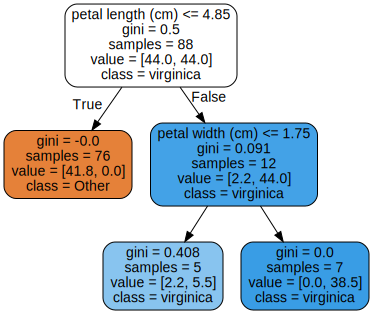

In [210]:
dot_data = tree.export_graphviz(tree_bal, out_file = None,
                          feature_names = data.feature_names,
                         class_names = ['Other', 'virginica'],
                          #aesthetic options
                         filled = True,rounded = True)
# plot tree structure from text file 
graph3 = graphviz.Source(dot_data)
graph3

#### min_weight_fraction_leaf is better in specifying  the weighted count of samples i.e w1*n1 + w2*n2 required in the leaf- although it is specified as fraction of total samples. This is weight aware approach against min_samples_leaf

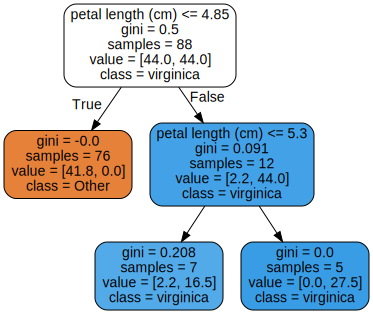

In [211]:
dot_data = tree.export_graphviz(tree_bal_2, out_file = None,
                          feature_names = data.feature_names,
                         class_names = ['Other', 'virginica'],
                          #aesthetic options
                         filled = True,rounded = True)
# plot tree structure from text file 
graph3 = graphviz.Source(dot_data)
graph3

##### Gini calculation with changed class weights can be verified with tree above and using formula stated previously
- Example of split 1, right node
  - w1*n1 = 2.2 ; w2 * n2 = 44
  - p1 = (2.2/46.2); p2 = (44/46.2)
  - g = 2 * p1 * p2 = 0.091
  - **Also, 'value' attribute shows weighted count of sample, actual count of samples can be computed as 4 and 8**

#### Re-weighting improves impurity calcuation, and results in better precision and recall of virginica ( minority class)

In [186]:
ub_pred = tree_ub.predict(X_test)
bal_pred = tree_bal.predict(X_test)
clf_ub = classification_report(Y_test, ub_pred, target_names = ['Other', 'virginica'])
clf_bal = classification_report(Y_test, bal_pred, target_names = ['Other', 'virginica'])

In [187]:
print(clf_ub)
print(clf_bal)

              precision    recall  f1-score   support

       Other       0.95      1.00      0.98        20
   virginica       1.00      0.50      0.67         2

   micro avg       0.95      0.95      0.95        22
   macro avg       0.98      0.75      0.82        22
weighted avg       0.96      0.95      0.95        22

              precision    recall  f1-score   support

       Other       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



#### 8. Multi-Output problems 
- Problems where multiple outputs are to be predicted using same features and data 
- If the outputs were indpendent, separate models can be built, BUT independence might be an incorrect assumpotion, if outputs are dependent on same features 
- So, it make sense to train all outputs together through a single estimator 
- Decision tree can solve for this by averaging the impurity metric for all outputs, and creating splits by computing 
average descrease in impurity for all outputs 
- Examples :
  - Predicting pixels of facial features in bottom half by using top half pixels 

#### 9. Practical Tips   
- **Awareness of greedy heuristic of trees, esp. when dealing with high dimensional, correlated features**
  - Trees work on heuristic of greedy split selection at each node, so it becomes important to feed in informative, uncorrelated features to tree.
    - Try to do some feature selection or reduction using PCA etc
    - Or try to introduce randomness in selecting features to split on, which is an added constraint on heuristic of         decision to split 
- Controlling overfitting for regression and classification, below params are useful
  - max_depth 
  - min_sample_leaf : This ensures, a good support is built for a decision in the leaf, for regression, should keep it high to prevent higher variance, for classification, 5 is good; but can be tuned
  - min_samples_split : This does not necessarlity ensure a good support
- **Imbalanced Classification**
  - trees are biased in favor of major class, the impurity metric is probability based. 
  - try using class weights, it alters impurity computation; and is akin to altering a loss function in parametric approaches 
  - tunable 
  - min_weight_fraction_leaf is a weight aware measure specified in fraction, against min_sample_leaf
- **Sparse Arrays**
  - if X matrix is sparse, convert to csr matrix

#### 10. Pros and Cons
|Pros|Cons|
|:-|:-|
|simple to understand|Trees are sensitive to data, slight changes in data, can cause performance to vary a lot, hence ensembe of trees is better approac when distribution can vary. Trees are based on heuritics, not necessarily optimal solution is produced by a tree, hence ensemble approaches are favored|
|Little data prep need, don't need feature scaling, do not make assumption on data distributions like some parametric methods |Overfit, despite pre-pruning approaches, again ensemble of trees come to be better|
|Can handle multi-output problems|Sensitive to class imbalance as discussed|